In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
import numpy as np
import scipy as scp
from statsmodels.tsa.ar_model import AutoReg
from itertools import product
from pylab import rcParams
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Подготовка данных (формирование временного ряда из данных -> создание матрицы)

In [3]:
our_columns = ['icethic_cea', 'iceconc','uice_ipa', 'vice_ipa','snowthic_cea']
df = pd.read_csv('arctic_results/ts_features.csv', header = None)
df.columns = our_columns
times = pd.date_range('2012-01-01', periods=len(df.index), freq='1h')
df.index = times

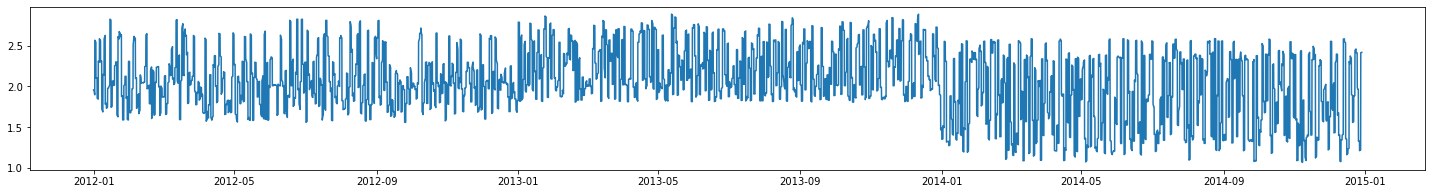

In [4]:
our_data = df['icethic_cea']
plt.subplots(figsize=(25, 3))
plt.plot(our_data)
plt.show()

In [5]:
df['dt'] = df.index
df['dt']=df['dt'].dt.round('1d')
dc = {column: 'mean' for column in our_columns}
df_daily = df.groupby('dt').agg(dc)

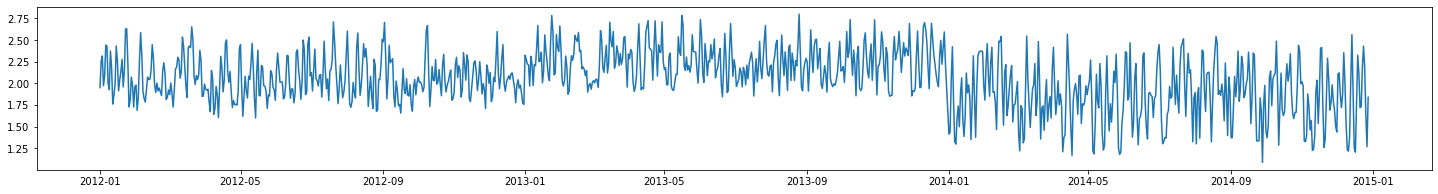

In [6]:
our_data = df_daily['icethic_cea'][:-1]
plt.subplots(figsize=(25, 3))
plt.plot(our_data)
plt.show()

In [7]:
our_data.shape

(1093,)

In [8]:
number_of_data_in_rw = (our_data.shape[0] // 100 * 30)
step = 30

print(number_of_data_in_rw, step)

300 30


In [56]:
start_idx = 0
mtrx = []
while start_idx + number_of_data_in_rw < our_data.shape[0]:
    mtrx.append(our_data[start_idx:start_idx + number_of_data_in_rw])
    start_idx += step

mtrx = np.array(mtrx)

In [57]:
mtrx.shape

(27, 300)

# SVD

In [46]:
from numpy import linalg

In [58]:
result = linalg.svd(mtrx, full_matrices=False)

In [59]:
result[2].shape

(27, 300)

In [49]:
t = pd.DataFrame(result[2])

In [60]:
result[1]

array([188.4028787 ,   9.28973127,   7.00427843,   6.28694724,
         6.22871525,   6.10787458,   6.04194334,   5.66521251,
         5.5041372 ,   5.17656917,   5.01918321,   4.77475864,
         4.61918342,   4.56764168,   4.4493403 ,   4.36560243,
         4.13510334,   4.07089634,   3.63236562,   3.57177983,
         3.3146541 ,   3.22358442,   3.0660784 ,   2.99277321,
         2.92843546,   2.84722292,   2.59879494])

In [32]:
t.head(2)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.057464,-0.057661,-0.059004,-0.059469,-0.058625,-0.058605,-0.060115,-0.060128,-0.057242,-0.056066,...,-0.057380,-0.057405,-0.057881,-0.05798,-0.056338,-0.055033,-0.054948,-0.056742,-0.059666,-0.057919
1,0.032798,0.060067,0.093541,0.083426,0.042395,0.004070,0.055630,0.118773,0.080946,0.021009,...,-0.102885,-0.079914,-0.075738,-0.05413,-0.058294,-0.053871,-0.053657,-0.069942,-0.063733,-0.044540


In [64]:
r = 7

In [65]:
V_r = result[2][1:r, :]
print(V_r.shape)

(6, 300)


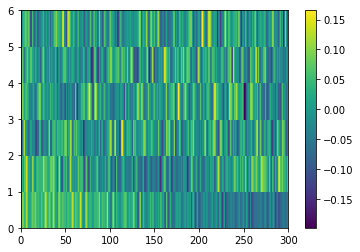

In [66]:
plt.pcolor(V_r)
plt.colorbar()
plt.show()

# TEST DMD

In [68]:
from pydmd import DMD

In [76]:
dmd = DMD(svd_rank=2)
dmd.fit(V_r)

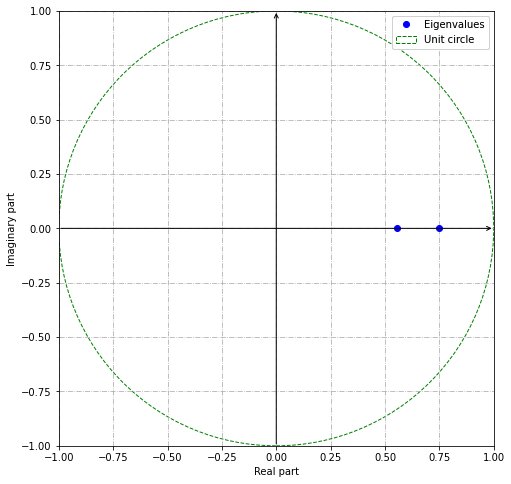

In [77]:
dmd.plot_eigs(show_axes=True, show_unit_circle=True)